# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

# Tasks, Part 1

In [ ]:
df[['Price','Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


In [ ]:
#load dataset
x = df[['Mileage']]
y = df[['Price']]

In [ ]:
# Fit the model

linreg = LinearRegression()

In [ ]:
linreg.fit(x,y)

LinearRegression()

In [ ]:
coefficient = linreg.coef_
intercept = linreg.intercept_
print(coefficient,intercept)

[[-0.1725205]] [24764.55900606]


In [ ]:
# 1. linear regression equation for mileage vs price
print(f"Equation : y = {linreg.coef_} * x + {linreg.intercept_}")

Equation : y = [[-0.1725205]] * x + [24764.55900606]


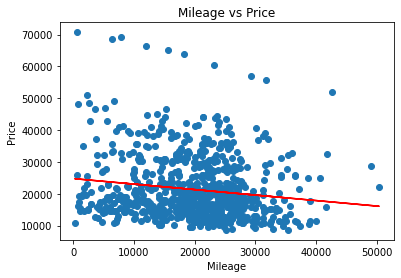

In [ ]:
# 2. Chart the original data and the equation on the chart
plt.scatter(x,y)
plt.plot(x,linreg.predict(x),color = 'red')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
# 3.Find the equation's  𝑅2  score
print('r2-score: ', linreg.score(x, y))

r2-score:  0.02046344732348926


# Tasks, Part 2

In [ ]:
# 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound', 'Leather']]
Y = df[['Price']]

In [ ]:
linre = LinearRegression()
linre.fit(X,Y)

LinearRegression()

In [ ]:
print('intercept:',linre.intercept_)
print('coeeficient:',linre.coef_)

intercept: [6758.7551436]
coeeficient: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [ ]:
# Find the equation's R2 score
print('r2_score:',linre.score(X,Y))

r2_score: 0.4462643536728379


In [ ]:
# 3. Find the combination of the factors that is the best predictor for price.
corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)

Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Name: Price, dtype: float64


In [ ]:
# So on the above correlation values it is clear that Cylinder is the best predictor for price followed with Liter.

# Tasks, Hard Mode

In [ ]:
# Research dummy variables in scikit-learn to see how to use the make, model, and body type.
df1 = df[["Price",'Make','Model','Type']]


In [ ]:
df1

,Price,Make,Model,Type
0,17314.103129,Buick,Century,Sedan
1,17542.036083,Buick,Century,Sedan
2,16218.847862,Buick,Century,Sedan
3,16336.913140,Buick,Century,Sedan
4,16339.170324,Buick,Century,Sedan
...,...,...,...,...
799,16507.070267,Saturn,L Series,Sedan
800,16175.957604,Saturn,L Series,Sedan
801,15731.132897,Saturn,L Series,Sedan
802,15118.893228,Saturn,L Series,Sedan


In [ ]:
df1 = pd.get_dummies(df1,columns = ['Make','Model','Type'])

In [ ]:
df1

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x1 = df1.iloc[:,1:]
y1 =df1.iloc[:,0]

In [ ]:
x1

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y1

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_1=LinearRegression()
linreg_1.fit(x1,y1)

LinearRegression()

In [ ]:
print('intercept:', linreg_1.intercept_)
print('coefficients:', linreg_1.coef_)

intercept: 3.736713073551753e+16
coefficients: [ 3.54621674e+16 -8.01254163e+16 -6.81633473e+16 -2.55767775e+16
 -3.14077518e+16 -9.14294606e+15 -1.01060773e+16 -1.01060773e+16
 -1.01060773e+16 -1.01060773e+16 -1.01060773e+16  2.66495182e+16
 -1.59370516e+16  3.86115871e+16  3.86115871e+16  2.66495182e+16
 -7.69759965e+16  2.66495182e+16  2.66495182e+16  2.66495182e+16
  3.86115871e+16 -1.59370516e+16 -1.59370516e+16 -1.59370516e+16
 -1.59370516e+16  2.66495182e+16 -3.23708831e+16 -3.23708831e+16
 -7.69759965e+16 -7.69759965e+16  2.66495182e+16  2.66495182e+16
 -7.69759965e+16  3.86115871e+16  3.86115871e+16 -1.59370516e+16
 -1.59370516e+16  3.86115871e+16  4.14669838e+15  4.14669838e+15
  4.14669838e+15  4.14669838e+15  4.14669838e+15]


In [ ]:
print('r-squared: ', linreg_1.score(x1, y1))

r-squared:  0.9584529353845586


In [ ]:
# 2. Find the combination of the factors that is the best predictor for price.
corr = df1.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)

Make_Cadillac       0.659297
Type_Convertible    0.508018
Model_XLR-V8        0.472538
Make_Chevrolet      0.404598
Name: Price, dtype: float64
